In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sber_data = pd.read_csv('data/sber_data.csv')
sber_data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,0,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,0,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,0,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,0,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,0,16331452


In [2]:
sber_data['life_sq'].describe() #жилая площадь


count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [5]:
print(sber_data[sber_data['life_sq'] == 0].shape[0]) # считаем строки [0]

45


In [6]:
display(sber_data[sber_data['life_sq'] > 7000])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
13546,13549,79,7478.0,8.0,Poselenie Voskresenskoe,NaN,0,NaN,0,0,...,5.072389,1.210613,0.826052,1.582378,0.756119,21.472421,14.917332,no data,0,7705000


In [17]:
outliers = sber_data[sber_data['life_sq'] > sber_data['full_sq']]
print(outliers.shape[0])
# это искаженные данные, где жиая плащадь больше общей, нужно удалить эти строки

37


In [18]:
cleaned = sber_data.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {cleaned.shape[0]}')

Результирующее число записей: 30434


In [11]:
display(sber_data['floor'].describe()) # этажи 

count    30304.000000
mean         7.670803
std          5.319989
min          0.000000
25%          3.000000
50%          6.500000
75%         11.000000
max         77.000000
Name: floor, dtype: float64

In [12]:
display(sber_data[sber_data['floor'] > 50])

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,mosque_count_1000,price_doc
23584,23587,57,33.0,77.0,Lomonosovskoe,3091.0,5,8359.0,7,1,...,0.310557,0.731683,0.489763,0.86354,0.863266,2.920671,2.757058,satisfactory,0,13700000


МЕТОД МЕЖКВАРТИЛЬНОГО РАЗМАХА (МЕТОД ТЬЮКИ)

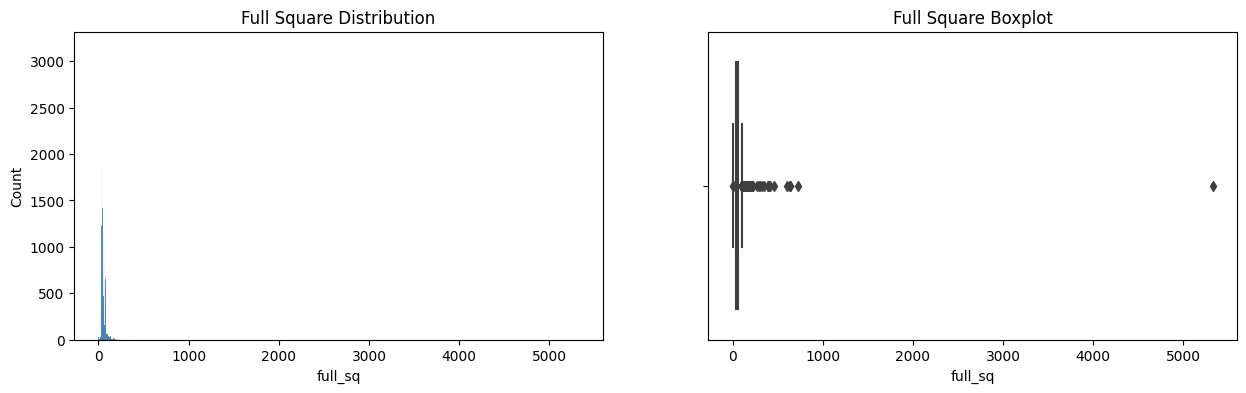

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=sber_data, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=sber_data, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

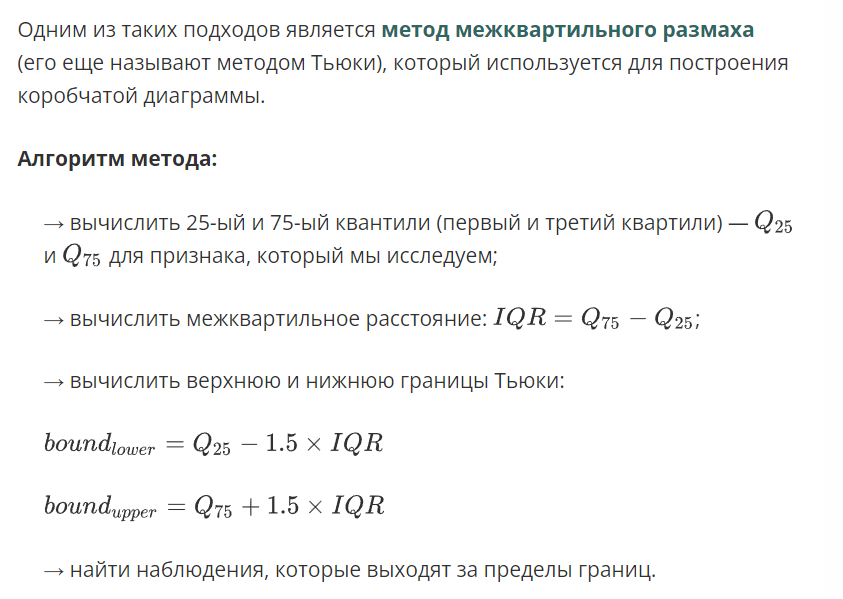

In [16]:
def outliers_iqr(data, feature): # DataFrame и признак
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75), #методо
    # пределения квантилей
    iqr = quartile_3 - quartile_1 # разница квантилей
    lower_bound = quartile_1 - (iqr * 1.5) # верхняя граница
    upper_bound = quartile_3 + (iqr * 1.5) # нижняя граница
    outliers = data[(x<lower_bound) | (x > upper_bound)] # выбрасы
    cleaned = data[(x>lower_bound) & (x < upper_bound)] # очищенная таблица
    return outliers, cleaned

In [20]:
outliers, cleaned = outliers_iqr(sber_data,'full_sq')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 963
Результирующее число записей: 29508


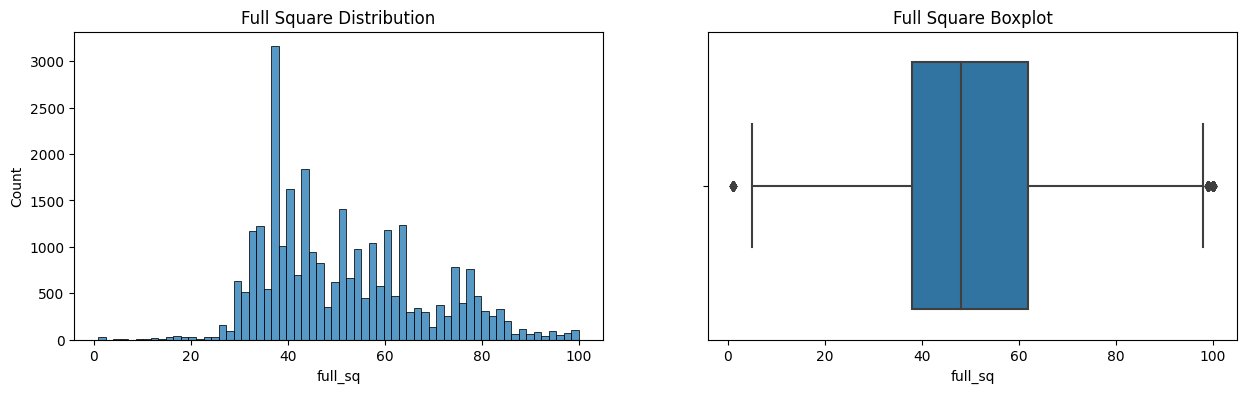

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

#### практика

Давайте немного модифицируем функцию outliers_iqr(data, feature). Добавьте в неё параметры left и right, которые задают число IQR влево и вправо от границ ящика (пусть по умолчанию они равны 1.5). Функция, как и раньше, должна возвращать потенциальные выбросы и очищенный DataFrame.

Назовите измененную функцию: outliers_iqr_mod`

Можете протестировать работу функции на DataFrame test_sber_data.csv.

In [22]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5): # DataFrame и признак
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75), #методо
    # пределения квантилей
    iqr = quartile_3 - quartile_1 # разница квантилей
    lower_bound = quartile_1 - (iqr * left) # верхняя граница
    upper_bound = quartile_3 + (iqr * right) # нижняя граница
    outliers = data[(x<lower_bound) | (x > upper_bound)] # выбрасы
    cleaned = data[(x>lower_bound) & (x < upper_bound)] # очищенная таблица
    return outliers, cleaned

In [28]:
outliers, cleaned = outliers_iqr_mod(sber_data,'full_sq', left = 1, right = 6)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 59
Результирующее число записей: 30403


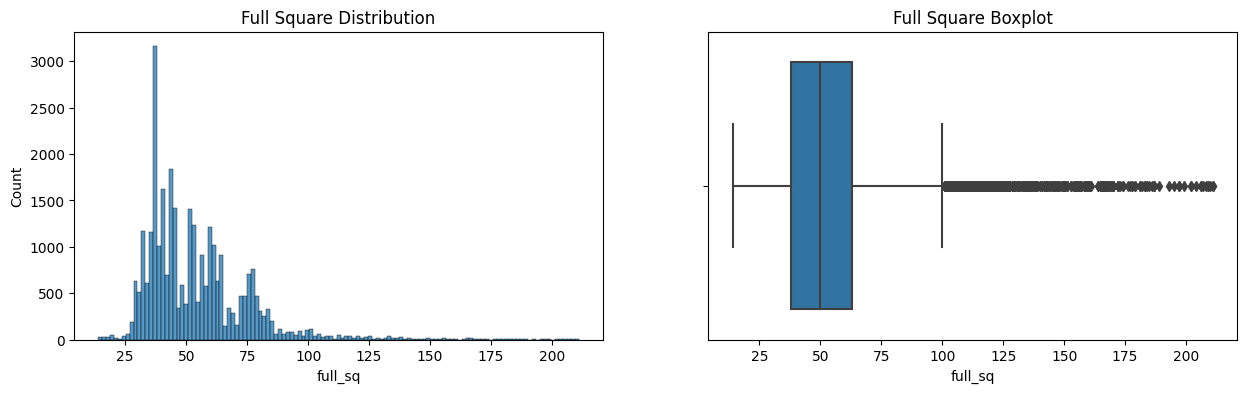

In [29]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='full_sq', ax=axes[0]);
histplot.set_title('Full Square Distribution');
boxplot = sns.boxplot(data=cleaned, x='full_sq', ax=axes[1]);
boxplot.set_title('Full Square Boxplot');

МЕТОД Z-ОТКЛОНЕНИЙ (МЕТОД СИГМ)

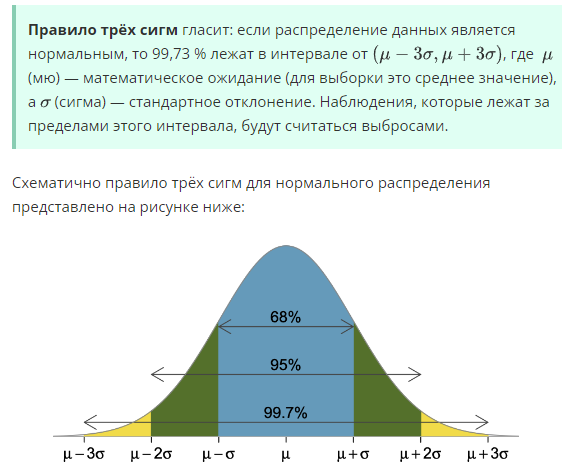

Построим две гистограммы признака расстояния до МКАД (mkad_km): первая — в обычном масштабе, а вторая — в логарифмическом. Логарифмировать будем с помощью функции log() из библиотеки numpy (натуральный логарифм — логарифм по основанию числа e). Признак имеет среди своих значений 0. Из математики известно, что логарифма от 0 не существует, поэтому мы прибавляем к нашему признаку 1, чтобы не логарифмировать нули и не получать предупреждения.

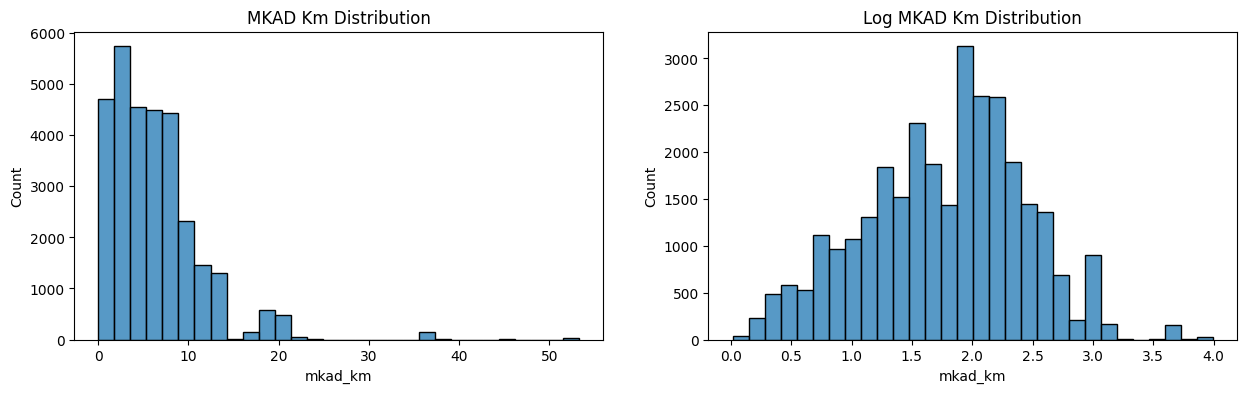

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

#гистограмма исходного признака
histplot = sns.histplot(sber_data['mkad_km'], bins=30, ax=axes[0])
histplot.set_title('MKAD Km Distribution');

#гистограмма в логарифмическом масштабе
log_mkad_km= np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km , bins=30, ax=axes[1])
histplot.set_title('Log MKAD Km Distribution');

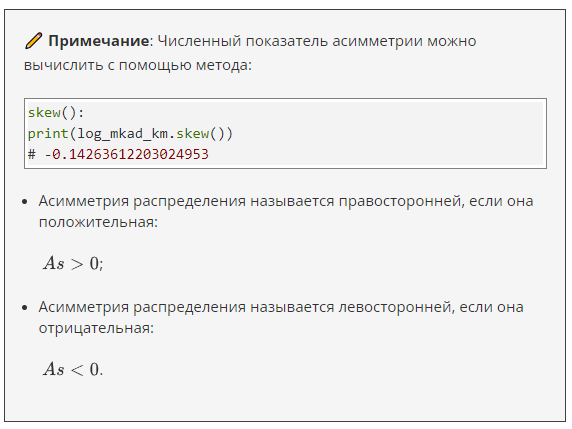

In [33]:
print(log_mkad_km.skew())
# -0.14263612203024953

-0.14263612203024953


In [34]:
def outliers_z_score(data, feature, log_scale=False): #DataFrame, признак,
    # возможность работы в логарифмическом масштабе. Если он равен True, то
    # будем логарифмировать рассматриваемый признак, иначе — оставляем его в
    # исходном виде.
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean() # среднее значение
    sigma = x.std() # стандартное откланение
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

In [35]:
outliers, cleaned = outliers_z_score(sber_data, 'mkad_km', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 33
Результирующее число записей: 30438


метод z-отклонения нашел нам 33 потенциальных выброса по признаку расстояния до МКАД. Давайте узнаем, в каких районах (sub_area) представлены эти квартиры:

In [36]:
print(outliers['sub_area'].unique())

['Poselenie Rogovskoe' 'Poselenie Kievskij']


 Возможно, мы не учли того факта, что наш логарифм распределения всё-таки не идеально нормален и в нём присутствует некоторая асимметрия. Возможно, стоит дать некоторое «послабление» на границы интервалов? Давайте отдельно построим гистограмму прологарифмированного распределения, а также отобразим на гистограмме вертикальные линии, соответствующие среднему (центру интервала в методе трёх сигм) и границы интервала . Вертикальные линии можно построить с помощью метода axvline(). Для среднего линия будет обычной, а для границ интервала — пунктирной (параметр ls ='--'):

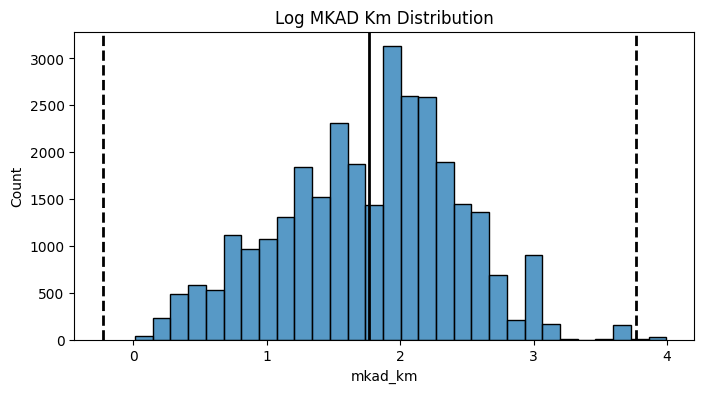

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['mkad_km'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('Log MKAD Km Distribution');

### практика

Давайте расширим правило трёх сигм, чтобы иметь возможность особенности данных. Добавьте в функцию outliers_z_score(data, feature, log_scale=False) параметры left и right, которые будут задавать число сигм (стандартных отклонений) влево и вправо соответственно, определяющее границы метода z-отклонения. По умолчанию оба параметры равны 3.

Результирующую функцию назовите outliers_z_score_mod().

Можете протестировать работу функции на DataFrame test_sber_data.csv. Проверять ваше решение мы будем, подавая на вход функции вместо data произвольный датафрейм.

In [41]:
import numpy as np
def outliers_z_score_mod(data, feature, left=3, right=3, log_scale=False): #DataFrame, признак,
    # возможность работы в логарифмическом масштабе. Если он равен True, то
    # будем логарифмировать рассматриваемый признак, иначе — оставляем его в
    # исходном виде.
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean() # среднее значение
    sigma = x.std() # стандартное откланение
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

Проверьте, что будет, если дать «послабление» вправо, увеличив число сигм. Наша задача — узнать, начиная с какой границы поселения «Роговское» и «Киевское» перестают считаться выбросами. Примените свою функцию outliers_z_score_mod() к признаку mkad_km с параметрами left=3, right=3.5, log_scale=True. Чему равно результирующее число выбросов?

In [43]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'mkad_km', left=3, right=3.5, log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 0
Результирующее число записей: 30471


Постройте гистограмму для признака price_doc в логарифмическом масштабе. А также, добавьте на график линии, отображающие среднее и границы интервала для метода трех сигм. Выберите верные утверждения:

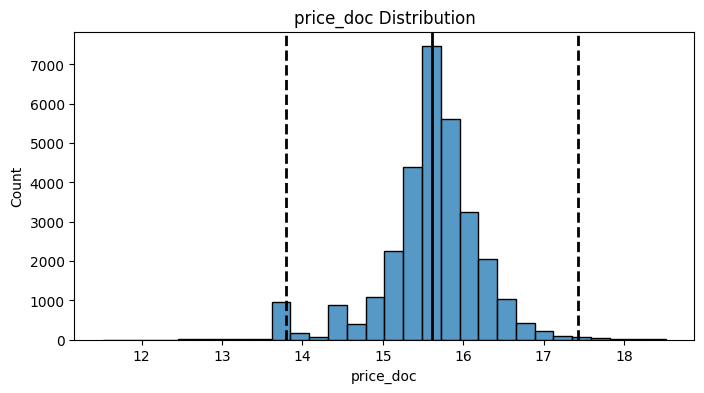

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
log_mkad_km = np.log(sber_data['price_doc'] + 1)
histplot = sns.histplot(log_mkad_km, bins=30, ax=ax)
histplot.axvline(log_mkad_km.mean(), color='k', lw=2)
histplot.axvline(log_mkad_km.mean()+ 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.axvline(log_mkad_km.mean()- 3 * log_mkad_km.std(), color='k', ls='--', lw=2)
histplot.set_title('price_doc Distribution');

Найдите потенциальные выбросы по признаку price_doc с помощью метода z-отклонения. Используйте логарифмический масштаб распределения. Сделайте «послабление» на 0.7 сигм в обе стороны распределения. Сколько выбросов вы получили?

In [50]:
outliers, cleaned = outliers_z_score_mod(sber_data, 'price_doc', left=3.7, right=3.7, log_scale=True)
print(f'Результирующее число записей: {cleaned.shape[0]}')
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')

Результирующее число записей: 30419
Число выбросов по методу z-отклонения: 52


Добавьте фишку с логарифмированием в свою функцию outliers_iqr_mod(). Добавьте в неё параметр log_scale. Если он выставлен в True, то производится логарифмирование признака. Примените полученную функцию к признаку price_doc. Число межквартильных размахов в обе стороны обозначьте как 3. Чему равно число выбросов, полученных таким методом?

In [51]:
def outliers_iqr_mod(data, feature, left = 1.5, right = 1.5, log_scale=False): 
    # DataFrame и признак и логорифмирование
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75), #методо
    # пределения квантилей
    iqr = quartile_3 - quartile_1 # разница квантилей
    lower_bound = quartile_1 - (iqr * left) # верхняя граница
    upper_bound = quartile_3 + (iqr * right) # нижняя граница
    outliers = data[(x<lower_bound) | (x > upper_bound)] # выбрасы
    cleaned = data[(x>lower_bound) & (x < upper_bound)] # очищенная таблица
    return outliers, cleaned

In [53]:
outliers, cleaned = outliers_iqr_mod(sber_data,'price_doc', left = 3, right = 3, log_scale=True)
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 92
Результирующее число записей: 30379
